# Deep Learning Assignment
This notebook contains both theoretical and practical answers to the deep learning assignment questions.

### What is deep learning, and how is it connected to artificial intelligence
Deep learning is a subset of machine learning in artificial intelligence (AI) that uses neural networks with many layers (hence 'deep') to model complex patterns in data. It is particularly powerful in tasks like image recognition, natural language processing, and speech recognition.

### What is a neural network, and what are the different types of neural networks
A neural network is a series of algorithms that attempts to recognize underlying relationships in data through a process that mimics how the human brain operates. Types include:
- Feedforward Neural Networks (FNN)
- Convolutional Neural Networks (CNN)
- Recurrent Neural Networks (RNN)
- Generative Adversarial Networks (GAN)
- Autoencoders

### What is the mathematical structure of a neural network
A neural network consists of an input layer, hidden layers, and an output layer. Each layer contains neurons. The output of each neuron is computed as:
```
y = activation(Σ(w_i * x_i) + b)
```
where `w_i` are weights, `x_i` inputs, `b` is bias, and `activation` is an activation function.

### What is an activation function, and why is it essential in neural network
An activation function introduces non-linearity into the output of a neuron. It allows neural networks to learn complex patterns.

### Could you list some common activation functions used in neural networks
Some common activation functions include:
- Sigmoid
- Tanh
- ReLU (Rectified Linear Unit)
- Leaky ReLU
- Softmax

### What is a multilayer neural network
A multilayer neural network has one or more hidden layers between the input and output layers. These layers allow the network to learn more complex representations.

### What is a loss function, and why is it crucial for neural network training
A loss function measures how far the predicted output is from the actual output. It is crucial because training aims to minimize this loss.

### What are some common types of loss functions
Common loss functions include:
- Mean Squared Error (MSE)
- Binary Crossentropy
- Categorical Crossentropy
- Hinge Loss

### How does a neural network learn
It learns by adjusting weights using optimization algorithms based on the loss gradient computed via backpropagation.

### What is an optimizer in neural networks, and why is it necessary
An optimizer updates the weights of the neural network to minimize the loss function. It is essential for effective training.

### Could you briefly describe some common optimizers
Common optimizers include:
- SGD (Stochastic Gradient Descent)
- Adam
- RMSprop
- Adagrad

### Can you explain forward and backward propagation in a neural network
Forward propagation calculates the output of the network. Backward propagation computes the gradient of the loss function with respect to each weight.

### What is weight initialization, and how does it impact training
Weight initialization sets the initial values of weights. Proper initialization (like Xavier or He) can help networks train faster and avoid problems like vanishing gradients.

### What is the vanishing gradient problem in deep learning
It occurs when gradients become too small during backpropagation, preventing weights from changing significantly, and thus halting learning.

### What is the exploding gradient problem?
It occurs when gradients grow exponentially during backpropagation, leading to unstable weights and diverging losses.

### How do you create a simple perceptron for basic binary classification

In [2]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### How can you build a neural network with one hidden layer using Keras

In [ ]:
pip install tensorflow

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

### How do you initialize weights using the Xavier (Glorot) initialization method in Keras

In [4]:
model.add(tf.keras.layers.Dense(64, kernel_initializer='glorot_uniform'))

### How can you apply different activation functions in a neural network in Keras

In [5]:
model.add(tf.keras.layers.Dense(32, activation='tanh'))

### How do you add dropout to a neural network model to prevent overfitting

In [6]:
model.add(tf.keras.layers.Dropout(0.5))

### How do you manually implement forward propagation in a simple neural network

In [7]:
import numpy as np
def relu(x):
    return np.maximum(0, x)
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    return z2

### How do you add batch normalization to a neural network model in Keras

In [8]:
model.add(tf.keras.layers.BatchNormalization())

### How can you visualize the training process with accuracy and loss curves

Epoch 1/10
25/25 [==============================] - 3s 15ms/step - loss: 0.6940 - accuracy: 0.4963 - val_loss: 0.6939 - val_accuracy: 0.5150
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5275 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5612 - val_loss: 0.6910 - val_accuracy: 0.4900
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6912 - val_accuracy: 0.5050
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.5638 - val_loss: 0.6899 - val_accuracy: 0.5400
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5575 - val_loss: 0.6891 - val_accuracy: 0.5500
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5825 - val_loss: 0.6884 - val_accuracy: 0.5300
Epoch 8/10
25/25 [=

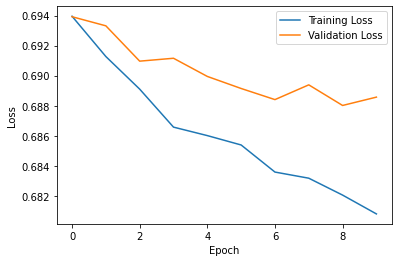

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Generate dummy data
X_train = np.random.random((1000, 10))  # 1000 samples, 10 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels

# 2. Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train the model and store history
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# 4. Plot training curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=1.0), loss='mse')

### How can you create a custom loss function in Keras

In [13]:
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
model.compile(optimizer='adam', loss=custom_loss)


### How can you visualize the structure of a neural network model in Keras?

In [14]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Thank You !!! 